# An Initial Study of Heteroscedasticity in the Sociome Datasets

## Motivation
Many public health organizations recognize that, beyond focusing on and treating biological mechanisms of disease, advancing health also critically requires accounting for and striving to mitigate adverse consequences of social, environmental, behavioral, and psychological factors. To date, such factors (called the “Sociome” in this project) have not been comprehensively codified and quantified in a way suitable for large-scale, extensible, co-analysis/data-mining with explicitly biological or clinical data to learn new insights into factors influencing wellness or disease. Rather, one-off projects lead to expensive and time-consuming data curation that does not benefit additional studies.

Practically speaking, clinical informatics researchers will have to combine and link public and private datasets with patient data to construct such a unified database of non-clinical factors. The most obvious dimensions in which to link these data are location (space) and date (time). One challenge is that these external datasets will have varying degrees of data quality, and even if the patient data areis relatively accurate, errors and biases can creep into the final analysis. Furthermore, linking data across multiple data sources and formats is always a heuristic process, introducing further errors in the process. We hypothesize that the systematic nature of such errors are under-appreciated and, to the best of our knowledge, not quantified in prior work. 

## Notebook Overview and Prerequisites
This notebook presents an initial study of the datasets collected in the Sociome project for evidence of such systematic uncertainty. We will leverage American Community Survey data to identify how such uncertainty is distributed geographically and demographically in Cook County, IL.

### Census Tract Geometries
We will use the `geopandas` library to first process geometric data of the census tracts in Illinois. This will allow us to localize any city data within a given tract.

This data was downloaded from:
https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2021&layergroup=Census+Tracts

In [38]:
import geopandas as gpd

In [42]:
df = gpd.read_file('data/tracts.shp')
df.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,047,957100,17047957100,9571,Census Tract 9571,G5020,S,17502924,151254,+38.3810609,-088.0566832,"POLYGON ((-88.10244 38.39351, -88.10232 38.393..."
1,17,047,956900,17047956900,9569,Census Tract 9569,G5020,S,289722767,430838,+38.4939617,-088.0440563,"POLYGON ((-88.14857 38.46782, -88.14856 38.468..."
2,17,167,003901,17167003901,39.01,Census Tract 39.01,G5020,S,107283391,1202385,+39.6960595,-089.5296888,"POLYGON ((-89.59191 39.69246, -89.59116 39.692..."
3,17,167,003500,17167003500,35,Census Tract 35,G5020,S,548131091,280907,+39.7333761,-089.8871664,"POLYGON ((-89.99450 39.89447, -89.99451 39.897..."
4,17,167,003802,17167003802,38.02,Census Tract 38.02,G5020,S,71333933,955509,+39.8488280,-089.5115697,"POLYGON ((-89.56791 39.87580, -89.56739 39.875..."


The geopandas package allows us to easily plot out geospatial data. For example, running the following code plots all the census tracts for the state of Illinois.

<AxesSubplot:>

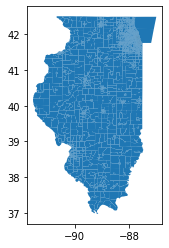

In [43]:
df.plot()

Cook County is designated by COUNTYFP '031' in this dataset, if we want to just get the census tracts from cook county we can do the following.

<AxesSubplot:>

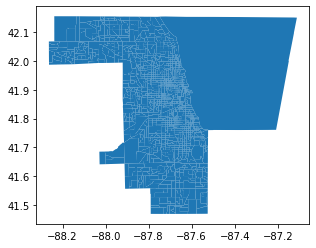

In [45]:
cook_county_tracts = df[df['COUNTYFP'] == '031']
cook_county_tracts.plot()

### Census Tract Demographics
The American Community Survey (ACS) is a demographics survey program conducted by the U.S. Census Bureau. It regularly gathers information previously contained only in the long form of the decennial census, such as ancestry, citizenship, educational attainment, income, language proficiency, migration, disability, employment, and housing characteristics. This data is organized by census tract. The next step is to load this data and link it to the geometries above.

In [64]:
import pandas as pd

In [79]:
cook_county_demographics = pd.read_csv('data/cook_county.csv')

In [86]:
cook_county_demographics.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A14006_001,SE_A10001_001,SE_A10060_001,SE_A10060_002,SE_A10060_003,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005
0,17031010100,14000US17031010100,"Census Tract 101, Cook County, Illinois","Census Tract 101, Cook County, Illinois",il,140,0,ACSSF,5857,NaN,...,32188,2625,2208,367,1841,3987,1143,661,1804,2183
1,17031010201,14000US17031010201,"Census Tract 102.01, Cook County, Illinois","Census Tract 102.01, Cook County, Illinois",il,140,0,ACSSF,5858,NaN,...,39122,3007,2619,648,1971,7216,2402,1751,4153,3063
2,17031010202,14000US17031010202,"Census Tract 102.02, Cook County, Illinois","Census Tract 102.02, Cook County, Illinois",il,140,0,ACSSF,5859,NaN,...,27318,1227,1022,245,777,1988,588,493,1081,907
3,17031010300,14000US17031010300,"Census Tract 103, Cook County, Illinois","Census Tract 103, Cook County, Illinois",il,140,0,ACSSF,5860,NaN,...,37111,3264,2739,765,1974,5111,1019,1360,2379,2732
4,17031010400,14000US17031010400,"Census Tract 104, Cook County, Illinois","Census Tract 104, Cook County, Illinois",il,140,0,ACSSF,5861,NaN,...,38384,2199,1869,427,1442,3623,655,702,1357,2266


We can link the census tract geometries with the ACS demographics.

In [87]:
cook_county_demographics['Geo_FIPS'] = cook_county_demographics['Geo_FIPS'].apply(str)

merged = cook_county_tracts.merge(cook_county_demographics, \
                                 left_on=['GEOID'], \
                                 right_on=['Geo_FIPS'])
merged.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,SE_A14006_001,SE_A10001_001,SE_A10060_001,SE_A10060_002,SE_A10060_003,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005
0,17,031,221000,17031221000,2210,Census Tract 2210,G5020,S,220053,0,...,33090,1073,911,288,623,2991,829,930,1759,1232
1,17,031,221100,17031221100,2211,Census Tract 2211,G5020,S,440042,0,...,40254,2086,1912,692,1220,4985,1367,1317,2684,2301
2,17,031,242800,17031242800,2428,Census Tract 2428,G5020,S,439630,0,...,62778,690,620,357,263,1360,186,233,419,941
3,17,031,242900,17031242900,2429,Census Tract 2429,G5020,S,323819,0,...,62750,912,827,307,520,1656,157,277,434,1222
4,17,031,243000,17031243000,2430,Census Tract 2430,G5020,S,324547,0,...,66635,1108,1053,476,577,2472,231,409,640,1832


The resulting merged dataset covers most of the Cook county with a few missing tracks corresponding to forest preserves, parks, airports, etc.

<AxesSubplot:>

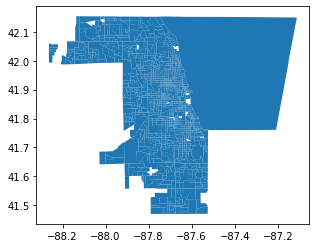

In [88]:
merged.plot()

In [89]:
merged.to_file('data/linked_tracts_demographics')

/var/folders/dj/w91d3y9x7cv3sx2jvpg999180000gn/T/ipykernel_52563/3625760056.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged.to_file('data/linked_tracts_demographics')


### Understanding This Dataset (and Basic Geo Pandas Manipulations)
Now, let's slice and dice this linked dataset to get some familiarity with what is going on in it. For example, suppose we want to plot the census tracts by median household income.

<AxesSubplot:>

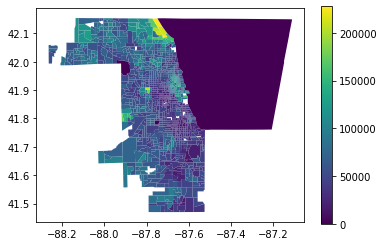

In [92]:
merged.plot(column='SE_A14006_001', legend=True)

Or, we could plot the census tracts by the percentage of the population that self-reports as African American.

<AxesSubplot:>

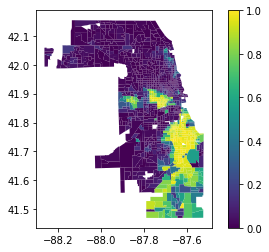

In [93]:
merged['PERC_AA']  = merged['SE_A03001_003']/merged['SE_A03001_001'] 

merged.plot(column='PERC_AA', legend=True)

Our goal is to use these basic manipulations to understand how inequities in data quality might actually correlate with demographic variables.


## Study 1. Business Listings
City business listings are a valuable data source for understanding a number of social determinants of health. For example, we can use these listings to determine the proximity to childcare or availability of fresh produce in a patients neighborhood. We start with a city of Chicago business dataset.

In [172]:
business = pd.read_csv('data/survey_datasets/business_listings.csv')

/Users/sanjaykrishnan/Documents/sociome-data-commons/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [109]:
business.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,2664681-20190513,2664681,398472,1,"ISLAND PARTY HUT, LLC",ISLAND PARTY HUT,355 E RIVERWALK SOUTH 1,CHICAGO,IL,60601.0,...,05/13/2019,05/12/2020,05/13/2019,05/13/2019,AAI,NaN,NaN,41.887806,-87.617882,"(41.88780560547408, -87.61788171685379)"
1,2664546-20190513,2664546,405793,1,"TINY LOUNGE ON THE RIVERWALK, L.L.C.",TINY TAPP,55-71 W RIVERWALK 1ST,CHICAGO,IL,60601.0,...,05/13/2019,05/12/2020,05/13/2019,05/13/2019,AAI,NaN,NaN,41.886952,-87.629875,"(41.88695199839048, -87.62987459293426)"
2,2699019-20191122,2699019,417235,4,ROBERT BAUSCH,Bob's Belgian Hot Chocolate,18 S ADDISON,BENSONVILLE,IL,60106.0,...,11/22/2019,05/13/2020,11/14/2019,11/22/2019,AAI,NaN,NaN,NaN,NaN,NaN
3,2699024-20191114,2699024,324455,15,Frieder Frotscher,German Grill,50 W WASHINGTON ST,CHICAGO,IL,60602.0,...,11/14/2019,05/13/2020,11/14/2019,11/14/2019,AAI,NaN,NaN,41.883322,-87.629775,"(41.88332219914999, -87.62977509664286)"
4,2699286-20191114,2699286,324457,16,Uli Koretz,Sweet Swabian,50 W WASHINGTON ST,CHICAGO,IL,60602.0,...,11/14/2019,05/13/2020,11/14/2019,11/14/2019,AAI,NaN,NaN,41.883322,-87.629775,"(41.88332219914999, -87.62977509664286)"


One of the key attributes in this dataset is the "BUSINESS ACTIVITY" tag, which categorizes the type of business in the listing. For example,

In [110]:
business['BUSINESS ACTIVITY'].unique()

array(['1 Yr Multiple - Special Event Food',
       '180 Day Multiple - Special Event Food',
       '180 Day Multiple - Special Event Food, Mobile Food Vehicle | 180 Day Multiple - Special Event Food',
       ...,
       'Retail Sales of General Merchandise and Non-Perishable Food | Payment Center | Retail Sales of Cell Phones and Accessories',
       'Retail Sales of Used Electronics | Retail Sales of Cell Phones and Accessories',
       'Retail Sales of General Merchandise | Provide Animal Boarding Services | Provide Animal Day Care Services | Provide Animal Training Services | Provide Animal Grooming Services'],
      dtype=object)

These tags are not particularly well-coded and there are a number of missing tags, composite tags, and multiple tags that refer to the same general type of listing.

In [113]:
business['BUSINESS ACTIVITY'].unique().size

2704

The fraction of business listings with missing activity tags

In [118]:
business['BUSINESS ACTIVITY'].isna().sum()/business['BUSINESS ACTIVITY'].count()

0.12690683607867007

The fraction of business listings with composite tags

In [120]:
business['BUSINESS ACTIVITY'].str.contains('\|').sum()/df['BUSINESS ACTIVITY'].count()

0.14577547837334043

### Business with Missing Values
Let's try to understand how missing values in the business listings geographically distribute through the city.

In [186]:
business[business['BUSINESS ACTIVITY'].isna()].head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,CENSUS_TRACT,BUSINESS ACTIVITY NA
22,19475-20180516,2584673,7943,1,"LINDBLAD CONSTRUCTION COMPANY OF JOLIET, INC.",LINDBLAD CONST CO OF JOLIET,717 E CASS ST,JOLIET,IL,60432.0,...,05/03/2018,05/04/2018,AAI,NaN,NaN,NaN,NaN,NaN,None,True
25,19114-20180516,2585016,28679,1,THE W. J. MCGUIRE COMPANY,The W. J. McGuire Company,1825 HOLSTE RD,NORTHBROOK,IL,60062.0,...,04/12/2018,04/13/2018,AAI,NaN,NaN,NaN,NaN,NaN,None,True
26,1772192-20180516,2586506,312595,1,MICHAELSON & MESSINGER INSURANCE SPECIALISTS LLC,MICHAELSON & MESSINGER INSURANCE SPECIALISTS LLC,15 SPINNING WHEEL RD 202,HINSDALE,IL,60521.0,...,03/27/2018,03/28/2018,AAI,NaN,NaN,NaN,NaN,NaN,None,True
28,2153571-20180516,2587414,372310,1,"ORBIT MEDICAL OF CHICAGO, LLC","ORBIT MEDICAL OF CHICAGO, LLC",1419 W CARROLL AVE 1ST,CHICAGO,IL,60607.0,...,05/23/2018,05/24/2018,AAI,NaN,NaN,41.887329,-87.663306,"(41.887329275371094, -87.66330569005213)",17031833000,True
29,54463-20180516,2585114,39100,1,"T COLLEY, DC MACADAM, J PANALL",CROSSHAIR,1319 W LAKE ST 1ST,CHICAGO,IL,60607.0,...,05/08/2018,05/09/2018,AAI,NaN,NaN,41.885351,-87.659654,"(41.885350841508796, -87.65965397606334)",17031833000,True


Next, we need to assign each business to a census tract.

In [138]:
from shapely.geometry import Polygon, LineString, Point
import numpy as np

In [173]:
N = len(business)#businesses
P = len(merged)#census tracts

tract_assignment = {}
for i in range(N):# iterate through all businesses
    
    b = business.iloc[i]
    lat = b['LATITUDE']
    long= b['LONGITUDE']
    
    if i%1000 == 0:
        print('Finished',i)
    
    if np.isnan(lat) or np.isnan(long):
        continue
    
    for j in range(P):
            
        census_tract = merged.iloc[j]

        if census_tract['geometry'].contains(Point(long,lat)):
            tract_assignment[i] = j
            break

Finished 0
Finished 1000
Finished 2000
Finished 3000
Finished 4000
Finished 5000
Finished 6000
Finished 7000
Finished 8000
Finished 9000
Finished 10000
Finished 11000
Finished 12000
Finished 13000
Finished 14000
Finished 15000
Finished 16000
Finished 17000
Finished 18000
Finished 19000
Finished 20000
Finished 21000
Finished 22000
Finished 23000
Finished 24000
Finished 25000
Finished 26000
Finished 27000
Finished 28000
Finished 29000
Finished 30000
Finished 31000
Finished 32000
Finished 33000
Finished 34000
Finished 35000
Finished 36000
Finished 37000
Finished 38000
Finished 39000
Finished 40000
Finished 41000
Finished 42000
Finished 43000
Finished 44000
Finished 45000
Finished 46000
Finished 47000
Finished 48000
Finished 49000
Finished 50000
Finished 51000
Finished 52000
Finished 53000
Finished 54000
Finished 55000
Finished 56000
Finished 57000
Finished 58000
Finished 59000


Now, we link the assigned track to the business dataset.

In [174]:
business['CENSUS_TRACT'] = None

In [175]:
for i in range(N):
    if i in tract_assignment:
        census_tract = tract_assignment[i]
        business.loc[i,'CENSUS_TRACT'] = \
                    merged.iloc[census_tract]['GEOID']

In [170]:
business.groupby('CENSUS_TRACT')['CENSUS_TRACT'].count()

CENSUS_TRACT
17031010100     4
17031010201     2
17031010202     5
17031010300     5
17031010400     4
               ..
17031843500    50
17031843600     4
17031843700    18
17031843800     2
17031980100     8
Name: CENSUS_TRACT, Length: 687, dtype: int64

In [176]:
business.to_csv('business_with_tract.csv')

Now, we can determine the fraction of businesses with missing acitivity entries.

In [295]:
business['BUSINESS ACTIVITY NA'] = (business['BUSINESS ACTIVITY'].isna()) #| (business['BUSINESS ACTIVITY'].str.contains('\|'))
aggregate = business.groupby('CENSUS_TRACT')['BUSINESS ACTIVITY NA'].agg(['sum','count'])

In [296]:
aggregate['perc'] = 0.126 - aggregate['sum']/(aggregate['count'])  #the county mean
aggregate = aggregate.drop(columns=['sum','count'])
plot_df = merged.merge(aggregate, \
                       left_on=['GEOID'], \
                       right_on=['CENSUS_TRACT'])
aggregate.reset_index()
aggregate['perc'] += 0.0

We can see that there are geographic unevenly distributed missing values in the city.

<AxesSubplot:>

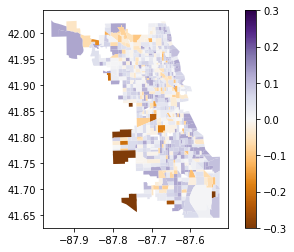

In [297]:
from matplotlib import cm

plot_df.plot(column='perc', cmap = 'PuOr', \
             legend=True, vmin=-0.3,vmax=0.3)

In [298]:
plot_df[['perc','SE_A14006_001']].corr()
#missing values have slight negative correlation with median income.

,perc,SE_A14006_001
perc,1.000000,-0.097369
SE_A14006_001,-0.097369,1.000000


We can do the same analysis for imprecise activity tags.

<AxesSubplot:>

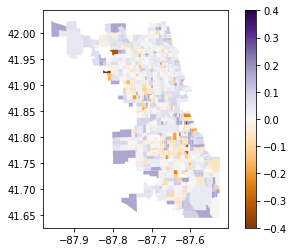

In [299]:
business['BUSINESS ACTIVITY NA'] = (~(business['BUSINESS ACTIVITY'].isna())) & (business['BUSINESS ACTIVITY'].str.contains('\|'))
aggregate = business.groupby('CENSUS_TRACT')['BUSINESS ACTIVITY NA'].agg(['sum','count'])
aggregate['perc'] = 0.167 - aggregate['sum']/(aggregate['count'])  #the county mean
aggregate = aggregate.drop(columns=['sum','count'])
plot_df = merged.merge(aggregate, \
                       left_on=['GEOID'], \
                       right_on=['CENSUS_TRACT'])
aggregate.reset_index()
aggregate['perc'] += 0.0

plot_df.plot(column='perc', cmap = 'PuOr', \
             legend=True, vmin=-0.4,vmax=0.4)

In [300]:
plot_df[['perc','PERC_AA']].corr() 
#imprecise data has a stronger negative correlation with AA neighborhoods.

,perc,PERC_AA
perc,1.000000,-0.174337
PERC_AA,-0.174337,1.000000


In [307]:
import rtree
from shapely.geometry import shape

idx = rtree.index.Index()

for j in range(P):# iterate through all businesses
    census_tract = merged.iloc[j]
    geometry = shape(census_tract['geometry'])
    idx.insert(fid, geometry.bounds)


for i in range(N):# iterate through all businesses
    
    b = business.iloc[i]
    lat = b['LATITUDE']
    long= b['LONGITUDE']
    
    if i%1000 == 0:
        print('Finished',i)
    
    if np.isnan(lat) or np.isnan(long):
        continue
    
    fids = [int(i) for i in idx.intersection(Point(long,lat).bounds)]